In [1]:
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.optim as optim
import torchvision.models as models
from dataset import ChestXrayDataset
from train import train
from evaluation import plot_results ,eval_on_metrics

In [2]:
IMAGE_PATH = "../archive/"
import glob

# Tüm alt klasörlerdeki jpg ve png dosyalarını alalım
image_paths = glob.glob(IMAGE_PATH + "**/images/*.[jp][pn]g", recursive=True)

print(f"Toplam {len(image_paths)} resim bulundu.")

Toplam 112120 resim bulundu.


In [3]:
TRAIN_PATH = 'data/AP_PA_Train.xlsx'
TEST_PATH = 'data/AP_PA_Test.xlsx'
VAL_PATH = 'data/AP_PA_Validation.xlsx'

In [4]:
num_classes = 2
EPOCHS = 100

In [5]:
model = models.resnet18(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)

for param in model.fc.parameters():
    param.requires_grad = True

c:\Users\Furkan-PC\192.168.0.14+8000\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Furkan-PC\192.168.0.14+8000\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(device)

cuda


In [7]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [8]:
train_dataset = ChestXrayDataset(TRAIN_PATH, image_paths,transform=transform)
val_dataset = ChestXrayDataset(TEST_PATH,image_paths, transform=transform)
test_dataset = ChestXrayDataset(VAL_PATH,image_paths, transform=transform)

In [9]:
print("Train size : ",len(train_dataset))
print("Validation size : ",len(val_dataset))
print("Test size : ",len(test_dataset))

Train size :  78566
Validation size :  16491
Test size :  17063


In [10]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True,num_workers=10)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=True,num_workers=10)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True,num_workers=10)

In [11]:
train_losses, train_accuracies, val_losses, val_accuracies = train(model, train_dataloader, val_dataloader, criterion, optimizer, device,EPOCHS)

Epoch 1/100 - Validation: 100%|██████████| 258/258 [01:11<00:00,  3.61it/s]


Epoch [1/100]
  Train Loss: 0.1223, Train Acc: 0.9602
  Val   Loss: 0.0672, Val   Acc: 0.9808
  Best model saved with val_loss: 0.0672


Epoch 2/100 - Validation: 100%|██████████| 258/258 [01:07<00:00,  3.80it/s]


Epoch [2/100]
  Train Loss: 0.0702, Train Acc: 0.9783
  Val   Loss: 0.0607, Val   Acc: 0.9814
  Best model saved with val_loss: 0.0607


Epoch 3/100 - Validation: 100%|██████████| 258/258 [01:09<00:00,  3.72it/s]


Epoch [3/100]
  Train Loss: 0.0648, Train Acc: 0.9805
  Val   Loss: 0.0567, Val   Acc: 0.9828
  Best model saved with val_loss: 0.0567


Epoch 4/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.13it/s]


Epoch [4/100]
  Train Loss: 0.0618, Train Acc: 0.9810
  Val   Loss: 0.0526, Val   Acc: 0.9847
  Best model saved with val_loss: 0.0526


Epoch 5/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.08it/s]


Epoch [5/100]
  Train Loss: 0.0593, Train Acc: 0.9820
  Val   Loss: 0.0662, Val   Acc: 0.9796


Epoch 6/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.06it/s]


Epoch [6/100]
  Train Loss: 0.0591, Train Acc: 0.9818
  Val   Loss: 0.0531, Val   Acc: 0.9843


Epoch 7/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.06it/s]


Epoch [7/100]
  Train Loss: 0.0587, Train Acc: 0.9821
  Val   Loss: 0.0498, Val   Acc: 0.9857
  Best model saved with val_loss: 0.0498


Epoch 8/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.04it/s]


Epoch [8/100]
  Train Loss: 0.0568, Train Acc: 0.9824
  Val   Loss: 0.0628, Val   Acc: 0.9799


Epoch 9/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.09it/s]


Epoch [9/100]
  Train Loss: 0.0565, Train Acc: 0.9830
  Val   Loss: 0.0521, Val   Acc: 0.9849


Epoch 10/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.12it/s]


Epoch [10/100]
  Train Loss: 0.0560, Train Acc: 0.9829
  Val   Loss: 0.0484, Val   Acc: 0.9862
  Best model saved with val_loss: 0.0484


Epoch 11/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.15it/s]


Epoch [11/100]
  Train Loss: 0.0566, Train Acc: 0.9829
  Val   Loss: 0.0500, Val   Acc: 0.9853


Epoch 12/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.12it/s]


Epoch [12/100]
  Train Loss: 0.0557, Train Acc: 0.9829
  Val   Loss: 0.0486, Val   Acc: 0.9857


Epoch 13/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.10it/s]


Epoch [13/100]
  Train Loss: 0.0561, Train Acc: 0.9837
  Val   Loss: 0.0483, Val   Acc: 0.9857
  Best model saved with val_loss: 0.0483


Epoch 14/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.10it/s]


Epoch [14/100]
  Train Loss: 0.0552, Train Acc: 0.9832
  Val   Loss: 0.0501, Val   Acc: 0.9853


Epoch 15/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.13it/s]


Epoch [15/100]
  Train Loss: 0.0555, Train Acc: 0.9834
  Val   Loss: 0.0563, Val   Acc: 0.9830


Epoch 16/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.12it/s]


Epoch [16/100]
  Train Loss: 0.0556, Train Acc: 0.9833
  Val   Loss: 0.0494, Val   Acc: 0.9853


Epoch 17/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.09it/s]


Epoch [17/100]
  Train Loss: 0.0540, Train Acc: 0.9835
  Val   Loss: 0.0474, Val   Acc: 0.9864
  Best model saved with val_loss: 0.0474


Epoch 18/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.14it/s]


Epoch [18/100]
  Train Loss: 0.0557, Train Acc: 0.9833
  Val   Loss: 0.0480, Val   Acc: 0.9862


Epoch 19/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.11it/s]


Epoch [19/100]
  Train Loss: 0.0551, Train Acc: 0.9833
  Val   Loss: 0.0533, Val   Acc: 0.9845


Epoch 20/100 - Validation: 100%|██████████| 258/258 [01:10<00:00,  3.67it/s]


Epoch [20/100]
  Train Loss: 0.0546, Train Acc: 0.9841
  Val   Loss: 0.0530, Val   Acc: 0.9851


Epoch 21/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.09it/s]


Epoch [21/100]
  Train Loss: 0.0545, Train Acc: 0.9832
  Val   Loss: 0.0501, Val   Acc: 0.9854


Epoch 22/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.14it/s]


Epoch [22/100]
  Train Loss: 0.0543, Train Acc: 0.9835
  Val   Loss: 0.0479, Val   Acc: 0.9866


Epoch 23/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.13it/s]


Epoch [23/100]
  Train Loss: 0.0537, Train Acc: 0.9842
  Val   Loss: 0.0495, Val   Acc: 0.9861


Epoch 24/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.10it/s]


Epoch [24/100]
  Train Loss: 0.0552, Train Acc: 0.9835
  Val   Loss: 0.0492, Val   Acc: 0.9862


Epoch 25/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.09it/s]


Epoch [25/100]
  Train Loss: 0.0546, Train Acc: 0.9840
  Val   Loss: 0.0523, Val   Acc: 0.9842


Epoch 26/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.11it/s]


Epoch [26/100]
  Train Loss: 0.0547, Train Acc: 0.9835
  Val   Loss: 0.0480, Val   Acc: 0.9861


Epoch 27/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.14it/s]


Epoch [27/100]
  Train Loss: 0.0544, Train Acc: 0.9838
  Val   Loss: 0.0484, Val   Acc: 0.9862


Epoch 28/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.13it/s]


Epoch [28/100]
  Train Loss: 0.0543, Train Acc: 0.9842
  Val   Loss: 0.0485, Val   Acc: 0.9865


Epoch 29/100 - Validation: 100%|██████████| 258/258 [01:07<00:00,  3.80it/s]


Epoch [29/100]
  Train Loss: 0.0543, Train Acc: 0.9841
  Val   Loss: 0.0486, Val   Acc: 0.9855


Epoch 30/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.12it/s]


Epoch [30/100]
  Train Loss: 0.0528, Train Acc: 0.9843
  Val   Loss: 0.0495, Val   Acc: 0.9862


Epoch 31/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.10it/s]


Epoch [31/100]
  Train Loss: 0.0549, Train Acc: 0.9836
  Val   Loss: 0.0654, Val   Acc: 0.9808


Epoch 32/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.13it/s]


Epoch [32/100]
  Train Loss: 0.0532, Train Acc: 0.9846
  Val   Loss: 0.0482, Val   Acc: 0.9863


Epoch 33/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.12it/s]


Epoch [33/100]
  Train Loss: 0.0521, Train Acc: 0.9848
  Val   Loss: 0.0486, Val   Acc: 0.9859


Epoch 34/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.13it/s]


Epoch [34/100]
  Train Loss: 0.0544, Train Acc: 0.9834
  Val   Loss: 0.0585, Val   Acc: 0.9816


Epoch 35/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.12it/s]


Epoch [35/100]
  Train Loss: 0.0539, Train Acc: 0.9839
  Val   Loss: 0.0488, Val   Acc: 0.9864


Epoch 36/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.13it/s]


Epoch [36/100]
  Train Loss: 0.0540, Train Acc: 0.9836
  Val   Loss: 0.0481, Val   Acc: 0.9865


Epoch 37/100 - Validation: 100%|██████████| 258/258 [01:11<00:00,  3.60it/s]


Epoch [37/100]
  Train Loss: 0.0555, Train Acc: 0.9837
  Val   Loss: 0.0547, Val   Acc: 0.9830


Epoch 38/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.08it/s]


Epoch [38/100]
  Train Loss: 0.0536, Train Acc: 0.9840
  Val   Loss: 0.0498, Val   Acc: 0.9850


Epoch 39/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.08it/s]


Epoch [39/100]
  Train Loss: 0.0542, Train Acc: 0.9837
  Val   Loss: 0.0613, Val   Acc: 0.9801


Epoch 40/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.13it/s]


Epoch [40/100]
  Train Loss: 0.0538, Train Acc: 0.9842
  Val   Loss: 0.0564, Val   Acc: 0.9839


Epoch 41/100 - Validation: 100%|██████████| 258/258 [01:11<00:00,  3.60it/s]


Epoch [41/100]
  Train Loss: 0.0544, Train Acc: 0.9841
  Val   Loss: 0.0567, Val   Acc: 0.9821


Epoch 42/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.12it/s]


Epoch [42/100]
  Train Loss: 0.0557, Train Acc: 0.9837
  Val   Loss: 0.0547, Val   Acc: 0.9844


Epoch 43/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.13it/s]


Epoch [43/100]
  Train Loss: 0.0545, Train Acc: 0.9834
  Val   Loss: 0.0502, Val   Acc: 0.9865


Epoch 44/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.13it/s]


Epoch [44/100]
  Train Loss: 0.0541, Train Acc: 0.9833
  Val   Loss: 0.0488, Val   Acc: 0.9861


Epoch 45/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.16it/s]


Epoch [45/100]
  Train Loss: 0.0538, Train Acc: 0.9838
  Val   Loss: 0.0502, Val   Acc: 0.9867


Epoch 46/100 - Validation: 100%|██████████| 258/258 [01:10<00:00,  3.63it/s]


Epoch [46/100]
  Train Loss: 0.0536, Train Acc: 0.9839
  Val   Loss: 0.0571, Val   Acc: 0.9838


Epoch 47/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.10it/s]


Epoch [47/100]
  Train Loss: 0.0548, Train Acc: 0.9837
  Val   Loss: 0.0492, Val   Acc: 0.9853


Epoch 48/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.09it/s]


Epoch [48/100]
  Train Loss: 0.0549, Train Acc: 0.9836
  Val   Loss: 0.0518, Val   Acc: 0.9852


Epoch 49/100 - Validation: 100%|██████████| 258/258 [01:12<00:00,  3.57it/s]


Epoch [49/100]
  Train Loss: 0.0526, Train Acc: 0.9843
  Val   Loss: 0.0557, Val   Acc: 0.9827


Epoch 50/100 - Validation: 100%|██████████| 258/258 [01:07<00:00,  3.84it/s]


Epoch [50/100]
  Train Loss: 0.0529, Train Acc: 0.9841
  Val   Loss: 0.0489, Val   Acc: 0.9865


Epoch 51/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.07it/s]


Epoch [51/100]
  Train Loss: 0.0531, Train Acc: 0.9843
  Val   Loss: 0.0492, Val   Acc: 0.9860


Epoch 52/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.10it/s]


Epoch [52/100]
  Train Loss: 0.0535, Train Acc: 0.9839
  Val   Loss: 0.0491, Val   Acc: 0.9856


Epoch 53/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.16it/s]


Epoch [53/100]
  Train Loss: 0.0533, Train Acc: 0.9842
  Val   Loss: 0.0497, Val   Acc: 0.9852


Epoch 54/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.11it/s]


Epoch [54/100]
  Train Loss: 0.0536, Train Acc: 0.9840
  Val   Loss: 0.0493, Val   Acc: 0.9857


Epoch 55/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.11it/s]


Epoch [55/100]
  Train Loss: 0.0529, Train Acc: 0.9844
  Val   Loss: 0.0502, Val   Acc: 0.9857


Epoch 56/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.10it/s]


Epoch [56/100]
  Train Loss: 0.0557, Train Acc: 0.9828
  Val   Loss: 0.0540, Val   Acc: 0.9836


Epoch 57/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.11it/s]


Epoch [57/100]
  Train Loss: 0.0550, Train Acc: 0.9836
  Val   Loss: 0.0505, Val   Acc: 0.9853


Epoch 58/100 - Validation: 100%|██████████| 258/258 [01:11<00:00,  3.60it/s]


Epoch [58/100]
  Train Loss: 0.0542, Train Acc: 0.9839
  Val   Loss: 0.0524, Val   Acc: 0.9854


Epoch 59/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.14it/s]


Epoch [59/100]
  Train Loss: 0.0546, Train Acc: 0.9832
  Val   Loss: 0.0506, Val   Acc: 0.9851


Epoch 60/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.11it/s]


Epoch [60/100]
  Train Loss: 0.0542, Train Acc: 0.9836
  Val   Loss: 0.0488, Val   Acc: 0.9859


Epoch 61/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.13it/s]


Epoch [61/100]
  Train Loss: 0.0529, Train Acc: 0.9843
  Val   Loss: 0.0494, Val   Acc: 0.9862


Epoch 62/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.11it/s]


Epoch [62/100]
  Train Loss: 0.0538, Train Acc: 0.9839
  Val   Loss: 0.0543, Val   Acc: 0.9850


Epoch 63/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.09it/s]


Epoch [63/100]
  Train Loss: 0.0537, Train Acc: 0.9838
  Val   Loss: 0.0491, Val   Acc: 0.9861


Epoch 64/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.12it/s]


Epoch [64/100]
  Train Loss: 0.0542, Train Acc: 0.9842
  Val   Loss: 0.0496, Val   Acc: 0.9859


Epoch 65/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.11it/s]


Epoch [65/100]
  Train Loss: 0.0534, Train Acc: 0.9839
  Val   Loss: 0.0518, Val   Acc: 0.9852


Epoch 66/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.15it/s]


Epoch [66/100]
  Train Loss: 0.0539, Train Acc: 0.9836
  Val   Loss: 0.0530, Val   Acc: 0.9847


Epoch 67/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.13it/s]


Epoch [67/100]
  Train Loss: 0.0539, Train Acc: 0.9843
  Val   Loss: 0.0521, Val   Acc: 0.9842


Epoch 68/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.12it/s]


Epoch [68/100]
  Train Loss: 0.0552, Train Acc: 0.9836
  Val   Loss: 0.0522, Val   Acc: 0.9856


Epoch 69/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.07it/s]


Epoch [69/100]
  Train Loss: 0.0555, Train Acc: 0.9834
  Val   Loss: 0.0521, Val   Acc: 0.9842


Epoch 70/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.10it/s]


Epoch [70/100]
  Train Loss: 0.0543, Train Acc: 0.9836
  Val   Loss: 0.0581, Val   Acc: 0.9814


Epoch 71/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.13it/s]


Epoch [71/100]
  Train Loss: 0.0532, Train Acc: 0.9845
  Val   Loss: 0.0509, Val   Acc: 0.9847


Epoch 72/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.11it/s]


Epoch [72/100]
  Train Loss: 0.0537, Train Acc: 0.9842
  Val   Loss: 0.0509, Val   Acc: 0.9856


Epoch 73/100 - Validation: 100%|██████████| 258/258 [01:07<00:00,  3.84it/s]


Epoch [73/100]
  Train Loss: 0.0544, Train Acc: 0.9835
  Val   Loss: 0.0492, Val   Acc: 0.9855


Epoch 74/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.13it/s]


Epoch [74/100]
  Train Loss: 0.0544, Train Acc: 0.9839
  Val   Loss: 0.0486, Val   Acc: 0.9865


Epoch 75/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.14it/s]


Epoch [75/100]
  Train Loss: 0.0533, Train Acc: 0.9840
  Val   Loss: 0.0552, Val   Acc: 0.9822


Epoch 76/100 - Validation: 100%|██████████| 258/258 [01:01<00:00,  4.16it/s]


Epoch [76/100]
  Train Loss: 0.0542, Train Acc: 0.9841
  Val   Loss: 0.0528, Val   Acc: 0.9837


Epoch 77/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.13it/s]


Epoch [77/100]
  Train Loss: 0.0557, Train Acc: 0.9832
  Val   Loss: 0.0490, Val   Acc: 0.9857


Epoch 78/100 - Validation: 100%|██████████| 258/258 [01:11<00:00,  3.62it/s]


Epoch [78/100]
  Train Loss: 0.0539, Train Acc: 0.9839
  Val   Loss: 0.0565, Val   Acc: 0.9841


Epoch 79/100 - Validation: 100%|██████████| 258/258 [01:01<00:00,  4.19it/s]


Epoch [79/100]
  Train Loss: 0.0537, Train Acc: 0.9841
  Val   Loss: 0.0493, Val   Acc: 0.9854


Epoch 80/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.09it/s]


Epoch [80/100]
  Train Loss: 0.0547, Train Acc: 0.9836
  Val   Loss: 0.0494, Val   Acc: 0.9854


Epoch 81/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.07it/s]


Epoch [81/100]
  Train Loss: 0.0535, Train Acc: 0.9838
  Val   Loss: 0.0511, Val   Acc: 0.9851


Epoch 82/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.08it/s]


Epoch [82/100]
  Train Loss: 0.0535, Train Acc: 0.9840
  Val   Loss: 0.0489, Val   Acc: 0.9866


Epoch 83/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.12it/s]


Epoch [83/100]
  Train Loss: 0.0524, Train Acc: 0.9848
  Val   Loss: 0.0497, Val   Acc: 0.9854


Epoch 84/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.13it/s]


Epoch [84/100]
  Train Loss: 0.0541, Train Acc: 0.9843
  Val   Loss: 0.0502, Val   Acc: 0.9855


Epoch 85/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.09it/s]


Epoch [85/100]
  Train Loss: 0.0535, Train Acc: 0.9840
  Val   Loss: 0.0488, Val   Acc: 0.9860


Epoch 86/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.13it/s]


Epoch [86/100]
  Train Loss: 0.0536, Train Acc: 0.9840
  Val   Loss: 0.0535, Val   Acc: 0.9850


Epoch 87/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.12it/s]


Epoch [87/100]
  Train Loss: 0.0532, Train Acc: 0.9845
  Val   Loss: 0.0542, Val   Acc: 0.9847


Epoch 88/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.07it/s]


Epoch [88/100]
  Train Loss: 0.0545, Train Acc: 0.9837
  Val   Loss: 0.0489, Val   Acc: 0.9856


Epoch 89/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.04it/s]


Epoch [89/100]
  Train Loss: 0.0524, Train Acc: 0.9844
  Val   Loss: 0.0519, Val   Acc: 0.9857


Epoch 90/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.10it/s]


Epoch [90/100]
  Train Loss: 0.0556, Train Acc: 0.9832
  Val   Loss: 0.0503, Val   Acc: 0.9861


Epoch 91/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.11it/s]


Epoch [91/100]
  Train Loss: 0.0539, Train Acc: 0.9837
  Val   Loss: 0.0496, Val   Acc: 0.9853


Epoch 92/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.10it/s]


Epoch [92/100]
  Train Loss: 0.0541, Train Acc: 0.9838
  Val   Loss: 0.0601, Val   Acc: 0.9830


Epoch 93/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.11it/s]


Epoch [93/100]
  Train Loss: 0.0530, Train Acc: 0.9843
  Val   Loss: 0.0487, Val   Acc: 0.9858


Epoch 94/100 - Validation: 100%|██████████| 258/258 [01:03<00:00,  4.03it/s]


Epoch [94/100]
  Train Loss: 0.0544, Train Acc: 0.9837
  Val   Loss: 0.0500, Val   Acc: 0.9851


Epoch 95/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.10it/s]


Epoch [95/100]
  Train Loss: 0.0549, Train Acc: 0.9835
  Val   Loss: 0.0513, Val   Acc: 0.9853


Epoch 96/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.11it/s]


Epoch [96/100]
  Train Loss: 0.0536, Train Acc: 0.9838
  Val   Loss: 0.0513, Val   Acc: 0.9843


Epoch 97/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.15it/s]


Epoch [97/100]
  Train Loss: 0.0541, Train Acc: 0.9836
  Val   Loss: 0.0544, Val   Acc: 0.9836


Epoch 98/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.13it/s]


Epoch [98/100]
  Train Loss: 0.0541, Train Acc: 0.9842
  Val   Loss: 0.0492, Val   Acc: 0.9859


Epoch 99/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.15it/s]


Epoch [99/100]
  Train Loss: 0.0562, Train Acc: 0.9832
  Val   Loss: 0.0502, Val   Acc: 0.9850


Epoch 100/100 - Validation: 100%|██████████| 258/258 [01:02<00:00,  4.11it/s]

Epoch [100/100]
  Train Loss: 0.0551, Train Acc: 0.9832
  Val   Loss: 0.0496, Val   Acc: 0.9861


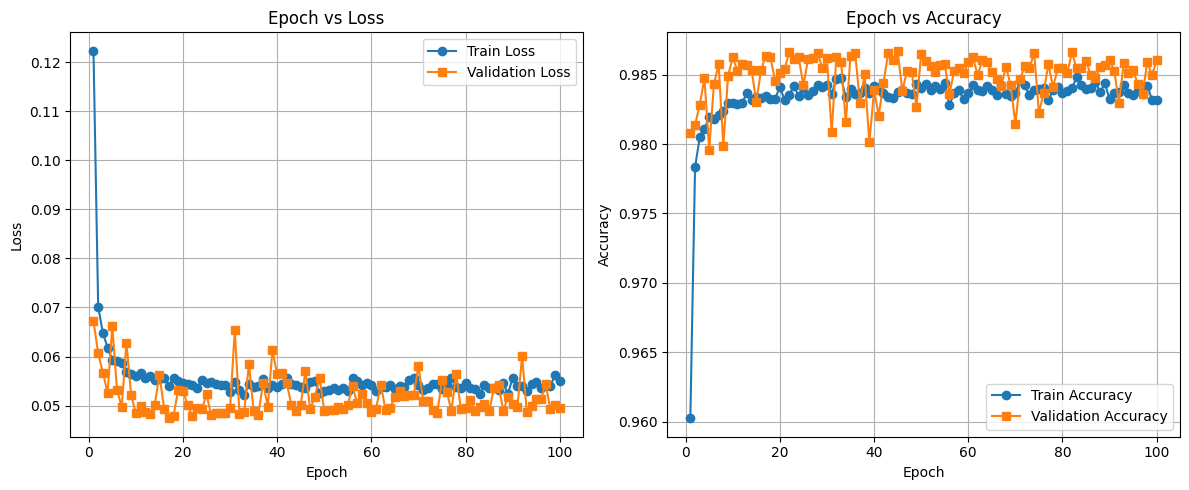

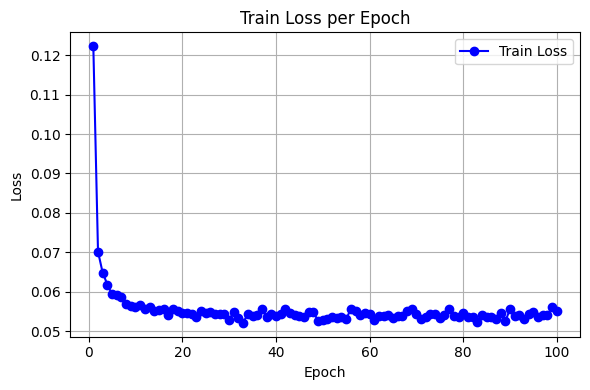

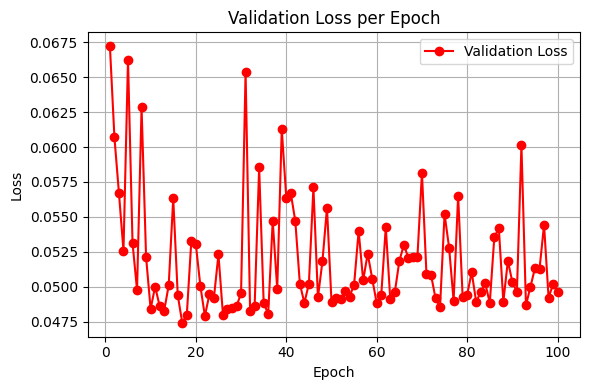

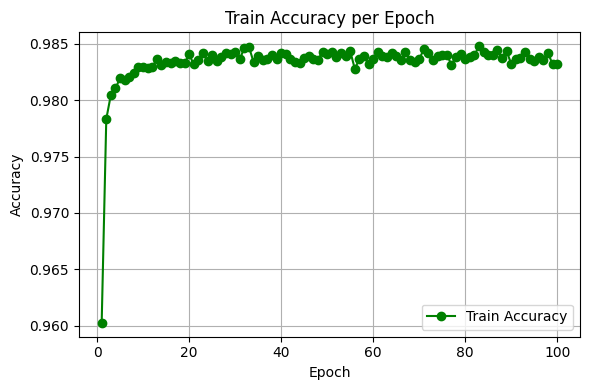

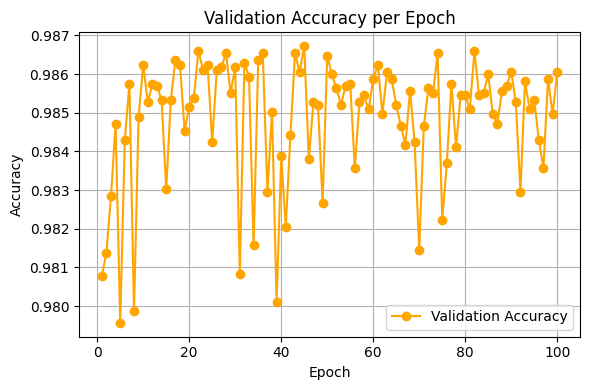

In [12]:
plot_results(EPOCHS, train_losses, train_accuracies, val_losses, val_accuracies)

Evaluating: 100%|██████████| 267/267 [01:12<00:00,  3.71it/s]

Precision: 0.9838
Recall:    0.9901
F1 Score:  0.9869
AUC:       0.9968


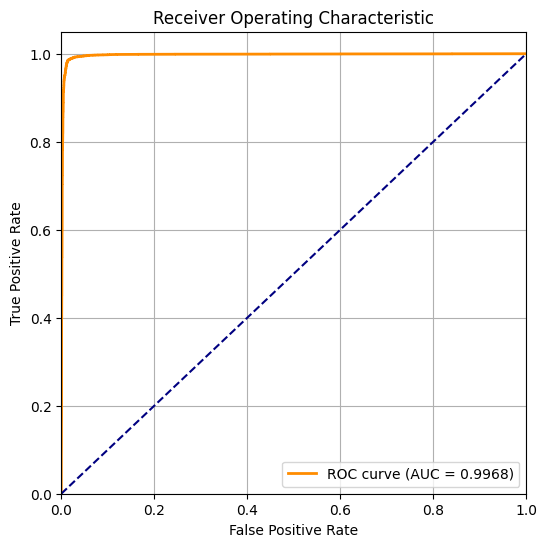

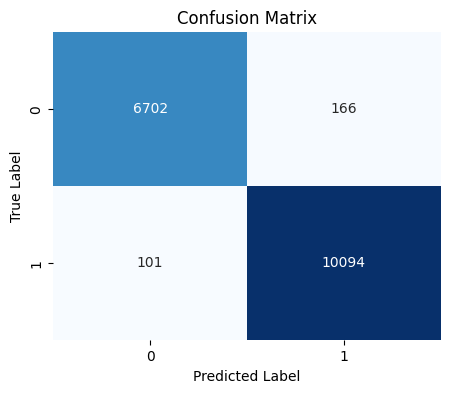

In [13]:
eval_on_metrics(model, test_dataloader)